In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from numpy.f2py.cfuncs import includes

df = pd.read_csv("../data/raw/FremontBridge.csv")
df.head()

,Date,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [22]:
df.shape

(116112, 4)

In [ ]:
df.describe().T

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116112 entries, 2012-10-02 13:00:00 to 2025-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Fremont Bridge Sidewalks, south of N 34th St Total                  115013 non-null  float64
 1   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  115013 non-null  float64
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  115013 non-null  float64
dtypes: float64(3)
memory usage: 3.5 MB


In [17]:
df.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St Total',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index()
df.head()

KeyError: 'Date'

In [8]:
missing = pd.DataFrame({
    "count" : df.isna().sum(),
    "rate" : df.isna().mean()
}).sort_values("count", ascending=True)

missing

,count,rate
Date,0,0.000000
"Fremont Bridge Sidewalks, south of N 34th St Total",1099,0.009465
"Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk",1099,0.009465
"Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk",1099,0.009465


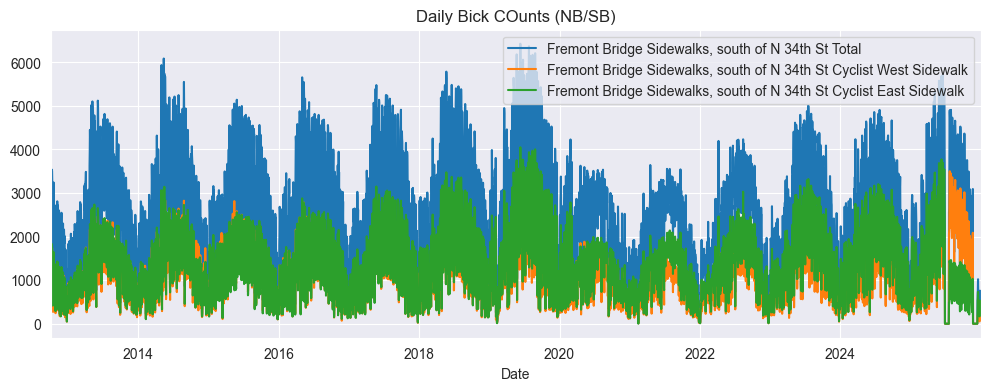

In [11]:
df.resample("D").sum().plot(figsize=(12,4))
plt.title("Daily Bick COunts (NB/SB)")
plt.show()

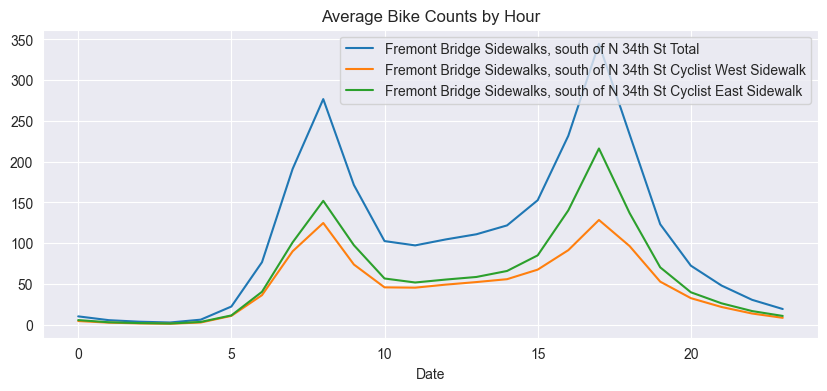

In [12]:
hourly = df.groupby(df.index.hour).mean()
hourly.plot(figsize=(10,4))
plt.title("Average Bike Counts by Hour")
plt.show()

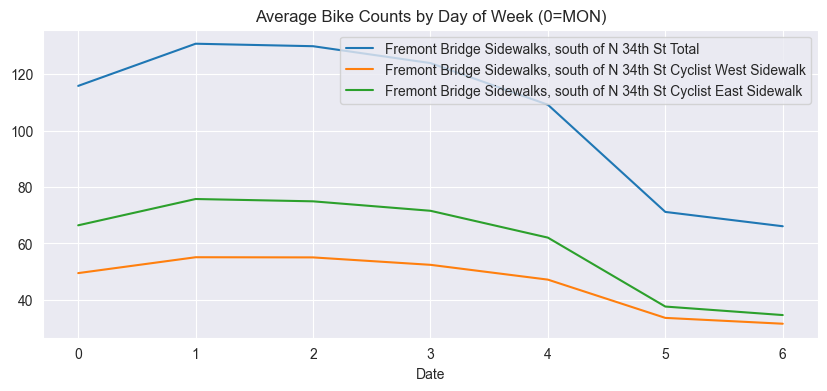

In [15]:
dow = df.groupby(df.index.dayofweek).mean()
dow.plot(figsize=(10,4))
plt.title("Average Bike Counts by Day of Week (0=MON)")
plt.show()